In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

# First iteration : Baseline

In [90]:
first_it = pd.read_pickle("data/first_iteration.pkl")
first_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16512 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [91]:
# define X, y
y = first_it["median_house_value"]
X = first_it.drop(["median_house_value","ocean_proximity"], axis=1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)

In [93]:
log_model = LinearRegression()

log_model.fit(X_train, y_train)

# Evaluate the model with the test set
log_model.score(X_test, y_test)

0.6311871393336708

In [94]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6348249131619211

In [95]:
cv_results["test_neg_root_mean_squared_error"].mean()

-69612.35723615628

# Second iteration : Outliers

In [96]:
second_it = pd.read_pickle("data/second_iteration.pkl")
second_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14766 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14766 non-null  int64  
 1   longitude           14766 non-null  float64
 2   latitude            14766 non-null  float64
 3   housing_median_age  14766 non-null  float64
 4   total_rooms         14766 non-null  float64
 5   total_bedrooms      14766 non-null  float64
 6   population          14766 non-null  float64
 7   households          14766 non-null  float64
 8   median_income       14766 non-null  float64
 9   median_house_value  14766 non-null  float64
 10  ocean_proximity     14766 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [97]:
# define X, y
y = second_it["median_house_value"]
X = second_it.drop(["ocean_proximity","median_house_value"], axis=1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)

In [99]:
log_model.fit(X_train, y_train)

# Evaluate the model with the test set
log_model.score(X_test, y_test)

0.6312422088575633

In [100]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6263840393225235

In [101]:
cv_results["test_neg_root_mean_squared_error"].mean()

-67061.22859788305

# Third iteration : Median imputation

In [102]:
third_it = pd.read_pickle("data/third_iteration.pkl")
third_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16512 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [103]:
# define X, y
y = third_it["median_house_value"]
X = third_it.drop(["median_house_value","ocean_proximity"], axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)

In [105]:
log_model.fit(X_train, y_train)

# Evaluate the model with the test set
log_model.score(X_test, y_test)

0.6322340999259999

In [106]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6358408199481806

In [107]:
cv_results["test_neg_root_mean_squared_error"].mean()

-69515.06329978097

# Fourth iteration : Mean imputation

In [108]:
fourth_it = pd.read_pickle("data/fourth_iteration.pkl")

In [109]:
# define X, y
y = fourth_it["median_house_value"]
X = fourth_it.drop(["median_house_value","ocean_proximity"], axis=1)

In [110]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6358408199481806

In [111]:
cv_results["test_neg_root_mean_squared_error"].mean()

-69515.06329978097

# Fifth iteration : iterative imputation

In [112]:
fifth_it = pd.read_pickle("data/fifth_iteration.pkl")

In [113]:
# define X, y
y = fifth_it["median_house_value"]
X = fifth_it.drop(["median_house_value","ocean_proximity"], axis=1)

In [114]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6348249131619182

In [115]:
cv_results["test_neg_root_mean_squared_error"].mean()

-69612.35723615656

# Sixth iteration : ocean_proximity encoding

In [116]:
sixth_it = pd.read_pickle("data/sixth_iteration.pkl")

In [117]:
# define X, y
y = sixth_it["median_house_value"]
X = sixth_it.drop(["median_house_value"], axis=1)

In [118]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6464622037671589

In [119]:
cv_results["test_neg_root_mean_squared_error"].mean()

-68492.0375321315

# Seventh iteration : normalization

In [120]:
seventh_it = pd.read_pickle("data/seventh_iteration.pkl")

In [121]:
# define X, y
y = seventh_it["median_house_value"]
X = seventh_it.drop(["median_house_value"], axis=1)

In [122]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6464622037671547

In [123]:
cv_results["test_neg_root_mean_squared_error"].mean()

-68492.03753213192

# Eighth iteration : feature selection

In [124]:
lsvc = log_model.fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)

/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [125]:
PD = pd.DataFrame(X_new)
PD

,0,1,2,3,4,5
0,-0.137635,0.534564,-0.032827,-1.258403,1.0,0.0
1,0.879836,-0.909979,-0.494784,1.610623,0.0,0.0
2,-0.312201,0.455091,-0.435204,-1.220425,1.0,0.0
3,0.620480,-0.713633,-0.723603,-1.233736,0.0,0.0
4,-0.830911,1.011403,-0.263373,0.114837,1.0,0.0
...,...,...,...,...,...,...
16507,-1.165080,1.852884,-0.595810,-0.423409,1.0,0.0
16508,-1.339646,1.161000,-0.262510,-0.660681,0.0,0.0
16509,-0.825923,1.539666,-0.197750,0.333675,1.0,0.0
16510,0.710257,-0.685584,0.959301,-0.680911,0.0,0.0


In [126]:
cv_results = cross_validate(log_model, PD, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6027994887662533

In [127]:
cv_results["test_neg_root_mean_squared_error"].mean()

-72601.20456385023

# Ninth iteration : other feature selection

In [128]:
# Create and fit selector
selector = SelectKBest(f_classif, k=8)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = seventh_it.iloc[:,cols]

In [129]:
features_df_new

,latitude,total_rooms,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY
0,0.534564,-0.357368,-0.218173,-1.258403,72000.0,0.0,0.0,0.0
1,-0.909979,-0.276515,-0.417841,1.610623,274100.0,1.0,0.0,0.0
2,0.455091,-0.799127,-0.744572,-1.220425,58300.0,0.0,0.0,0.0
3,-0.713633,-0.913406,-0.710862,-1.233736,200000.0,1.0,0.0,0.0
4,1.011403,-0.326201,-0.334862,0.114837,117900.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16507,1.852884,-0.532626,-0.651220,-0.423409,93800.0,0.0,0.0,0.0
16508,1.161000,-0.126100,-0.111856,-0.660681,103100.0,0.0,0.0,1.0
16509,1.539666,-0.051119,-0.187056,0.333675,192600.0,0.0,0.0,0.0
16510,-0.685584,0.059547,0.704970,-0.680911,153500.0,1.0,0.0,0.0


In [130]:
# define X, y
y = features_df_new["median_house_value"]
X = features_df_new.drop(["median_house_value"], axis=1)

In [131]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.5460456407922691

In [132]:
cv_results["test_neg_root_mean_squared_error"].mean()

-77609.6325148884

# Tenth iteration : Tree classifier feature selection

In [133]:
data = seventh_it
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

Tree selection

In [134]:
model = ExtraTreesClassifier(max_depth=5)
model.fit(X,y)

ExtraTreesClassifier(max_depth=5)

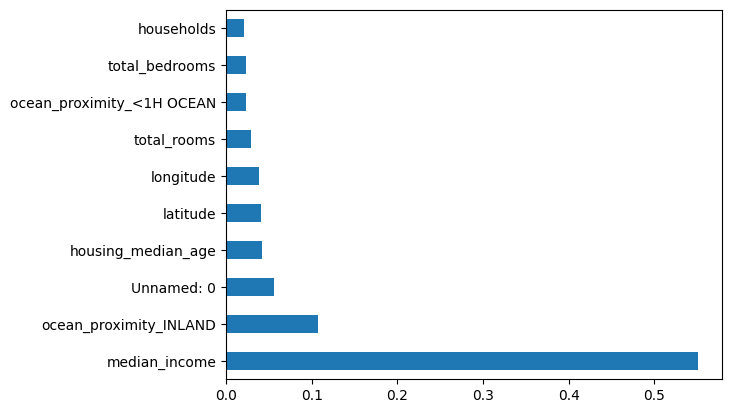

In [135]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Eleventh iteration : first feature engineering

In [136]:
eleventh_it = pd.read_pickle("data/eleventh_iteration.pkl")

In [137]:
# define X, y
y = eleventh_it["median_house_value"]
X = eleventh_it.drop(["median_house_value"], axis=1)

In [138]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6464624700137156

In [139]:
cv_results["test_neg_root_mean_squared_error"].mean()

-68492.01029533715

# Twelfth iteration : second feature engineering

In [140]:
twelfth_it = pd.read_pickle("data/twelfth_iteration.pkl")

In [141]:
# define X, y
y = twelfth_it["median_house_value"]
X = twelfth_it.drop(["median_house_value"], axis=1)

In [142]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6464514607195984

In [143]:
cv_results["test_neg_root_mean_squared_error"].mean()

-68493.07021365289

# Thirteenth iteration : third feature engineering

In [144]:
thirteen_it = pd.read_pickle("data/thirteenth_iteration.pkl")

In [145]:
# define X, y
y = thirteen_it["median_house_value"]
X = thirteen_it.drop(["median_house_value"], axis=1)

In [146]:
cv_results = cross_validate(log_model, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.6464514607195974

In [147]:
cv_results["test_neg_root_mean_squared_error"].mean()

-68493.070213653

# Model evaluation : Linear regression

In [186]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = log_model,
    X=X,y=y, 
    cv = 5, 
    scoring = "neg_root_mean_squared_error",
    train_sizes = [1,75,165,270,331])

In [187]:
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

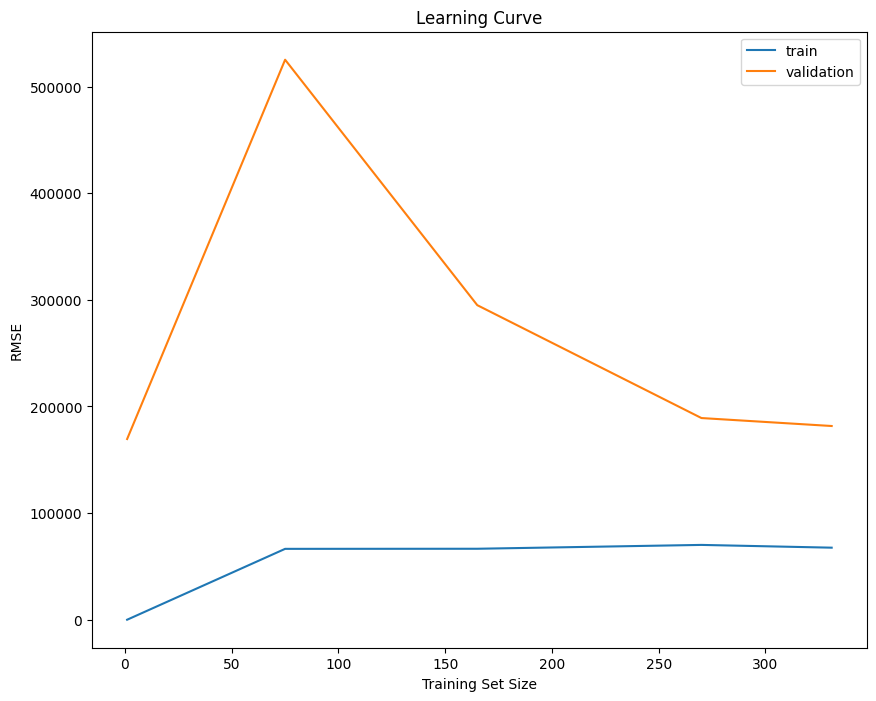

In [188]:
plt.subplots(figsize=(10,8))
plt.plot(train_sizes,train_mean,label="train")
plt.plot(train_sizes,test_mean,label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()

# Fourteenth iteration : KNN regressor

In [189]:
neigh = KNeighborsRegressor(n_neighbors=9)
cv_results = cross_validate(neigh, X, y, cv=5,scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))
cv_results["test_r2"].mean()

0.4470292840736566

In [190]:
cv_results["test_neg_root_mean_squared_error"].mean()

-85658.9004584295

In [191]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = neigh,
    X=X,y=y, 
    cv = 5, 
    scoring = "neg_root_mean_squared_error",
    train_sizes = [1,75,165,270,331])

/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  

In [192]:
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

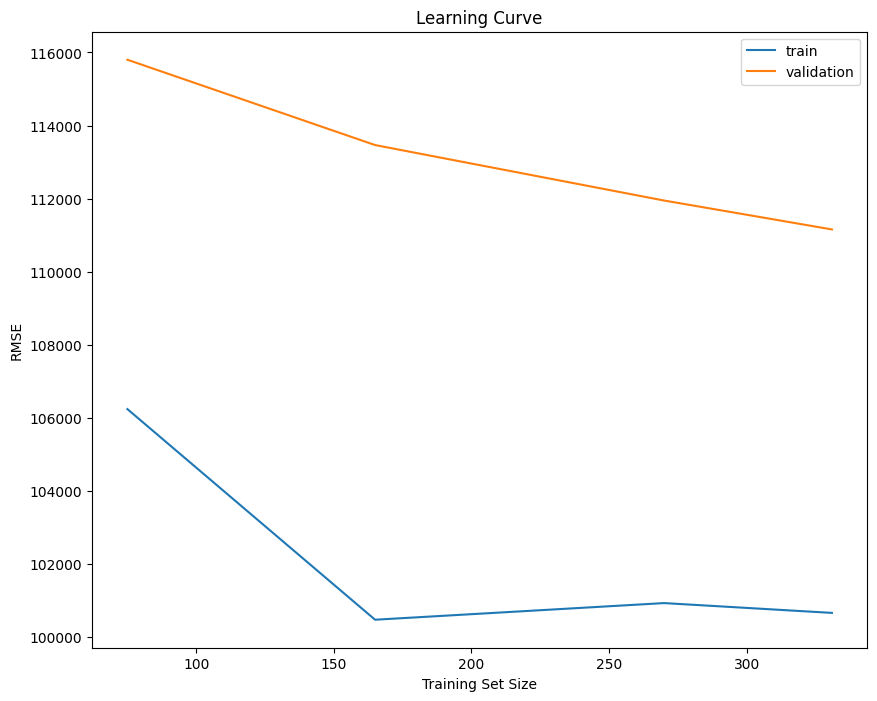

In [193]:
plt.subplots(figsize=(10,8))
plt.plot(train_sizes,train_mean,label="train")
plt.plot(train_sizes,test_mean,label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()